<a href="https://colab.research.google.com/github/madisonhgallagher/project_chd/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! git clone https://github.com/madisonhgallagher/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.




---



# Summary

In this project, our aim is to develop predictive algorithms for assessing the likelihood of an individual developing coronary heart disease (CHD). We utilize a range of demographic and health-related factors to construct models predicting the 10-year risk of CHD. Through extensive research, we identified key contributors such as cholesterol levels, blood pressure, and BMI, alongside additional variables including cigarettes per day, heart rate, and glucose levels. Following variable selection, we conducted thorough data cleaning by removing any missing values and conducted exploratory data analysis, employing techniques such as Kernel Density plots and scatterplots to uncover potential correlations with CHD. Leveraging separate training and testing datasets, we employed various modeling techniques including k-nearest neighbors (knn), linear regression, and decision trees. Each team member explored one of these models to ascertain the highest R-squared value. Despite our efforts, our models yielded low R-squared values, indicating limited predictive power for ten-year CHD risk. This conclusion is supported by our exploratory data analysis, which revealed minimal correlations among many variables. After extensive testing, we opted for the ____ model, which demonstrated the highest accuracy and R-squared value among our tested models.



---



# Data

The steps we took to clean our data:


1.   Checked the type of variables to make sure they are easy to work with. They all came out to be integers or floats which is good for our analysis.
2.   Observed the distribution of our data by finding the unique value counts and creating a histogram to see each of the variable's distribution.
3.   Dealt with the missing data by imputing the mean or dropping them from the data set based on how many missing values there are and if they are significant to the data. Many of the variables had no missing values, only education, cigsPerDay, BPMeds, totChol, BMI, and glucose.




In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/project_chd/fhs_train.csv')

In [9]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [10]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns[1:5], '\n') # First five column names

(3180, 17) 

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object 

Index(['sex', 'age', 'education', 'currentSmoker'], dtype='object') 



It looks like all of our data is already either a float or an integer, which is helpful for analysis.

In [11]:
print(df.iloc[0:5,1:17],'\n') # Show the zero to fourth rows/first to seventeenth columns

   sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   58        1.0              0         0.0     0.0                0   
1    0   40        1.0              1        15.0     0.0                0   
2    0   52        1.0              0         0.0     0.0                0   
3    1   38        2.0              1        43.0     0.0                0   
4    0   43        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    220.0  143.0  104.0  29.85         75     87.0   
1             0         0    199.0  122.0   82.0  22.16         85     77.0   
2             0         0    275.0  112.0   71.0  25.68         80      NaN   
3             1         0    170.0  130.0   94.0  23.90        110     75.0   
4             0         0    202.0  124.0   92.0  21.26         75     74.0   

   TenYearCHD  
0           1  
1           0  
2       

## Observing the distribution of different variables

[1 0] 

sex
0    1803
1    1377
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



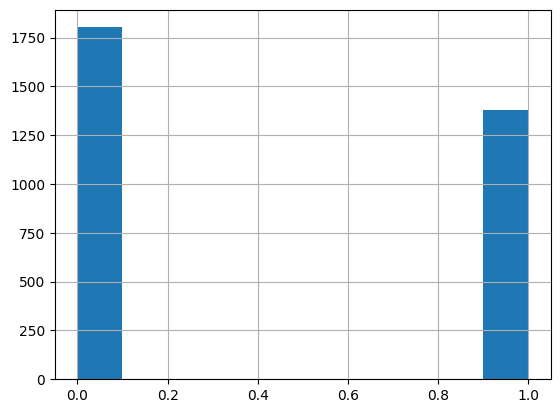

In [12]:
df['sex']
var = 'sex'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[58 40 52 38 43 56 54 47 61 59 64 45 51 63 57 48 46 60 39 53 49 50 44 68
 41 65 55 34 35 37 66 42 62 67 36 33 32 70 69] 

age
48    139
42    139
40    138
46    137
41    136
39    125
45    125
43    116
44    116
55    113
52    113
38    112
47    107
53    104
54    103
51    101
50    100
49    100
56     93
58     91
60     90
61     87
59     86
63     85
57     84
62     75
64     66
37     63
36     60
65     50
67     31
35     30
66     29
34     14
68     10
33      5
69      4
70      2
32      1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



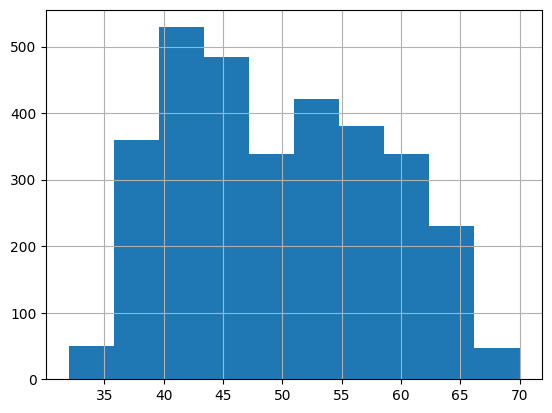

In [13]:
df['age']
var = 'age'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[ 1.  2.  4.  3. nan] 

education
1.0    1310
2.0     949
3.0     495
4.0     341
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



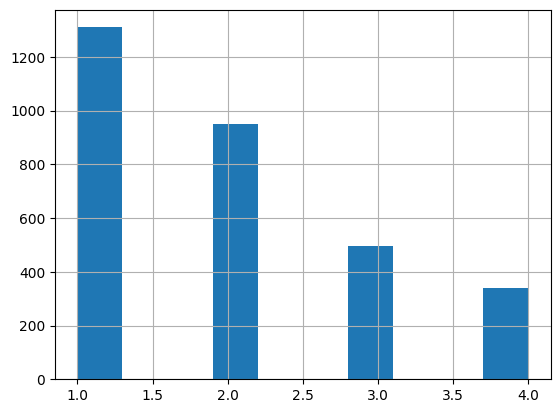

In [14]:
var = 'education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[0 1] 

currentSmoker
0    1619
1    1561
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



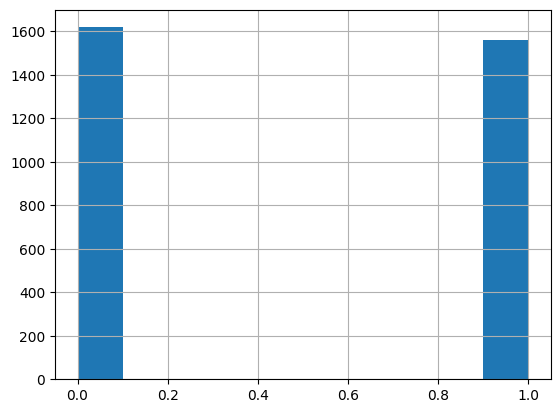

In [15]:
var = 'currentSmoker'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[ 0. 15. 43. 20.  9.  3. 10. 40.  5. nan 25. 18.  6.  2. 30.  1.  8.  7.
 12. 23. 35. 29. 11. 16. 14. 60. 70. 19.  4. 45. 50. 17. 38. 13.] 

cigsPerDay
0.0     1619
20.0     528
30.0     172
15.0     159
10.0     108
5.0       95
9.0       94
3.0       73
40.0      67
1.0       53
43.0      40
25.0      33
35.0      16
6.0       15
2.0       13
8.0       10
60.0       9
7.0        9
18.0       7
23.0       5
11.0       5
50.0       5
4.0        4
17.0       4
16.0       3
12.0       2
19.0       2
29.0       1
14.0       1
70.0       1
45.0       1
38.0       1
13.0       1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



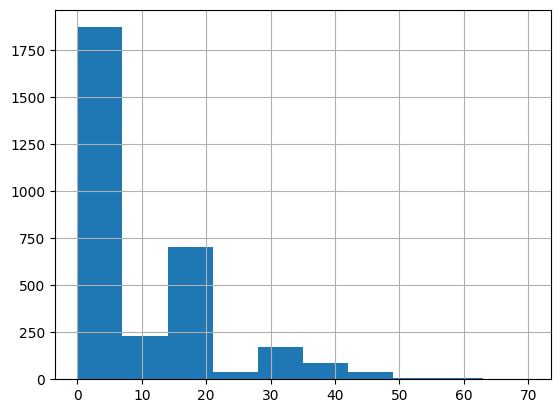

In [16]:
var = 'cigsPerDay'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[ 0.  1. nan] 

BPMeds
0.0    3050
1.0      93
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



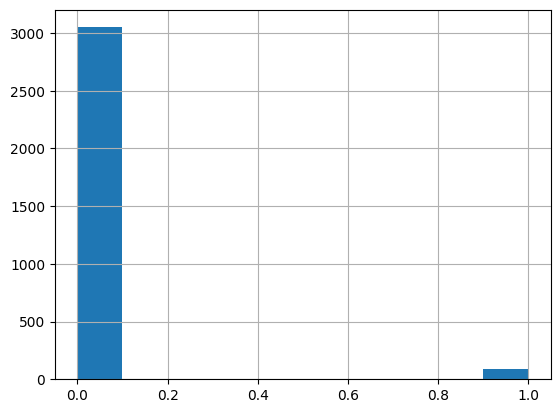

In [17]:
var = 'BPMeds'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

## Dealing with missing data

count    3180.000000
mean        0.433019
std         0.495571
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64 

0 



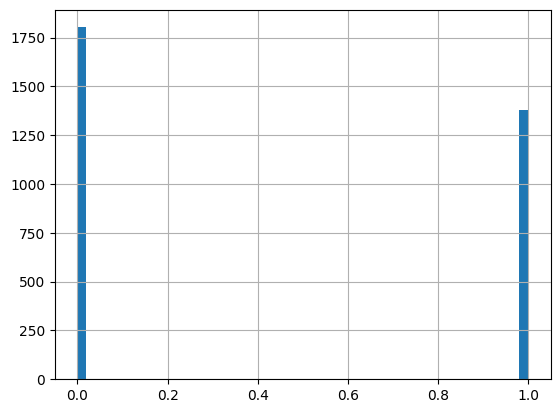

In [18]:
var = 'sex'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['sex_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['sex_NA']),'\n') # How many missing values are there?

There are no missing values for sex.

Before coercion: 
 count    3180.000000
mean       49.633962
std         8.557596
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64 



<Axes: >

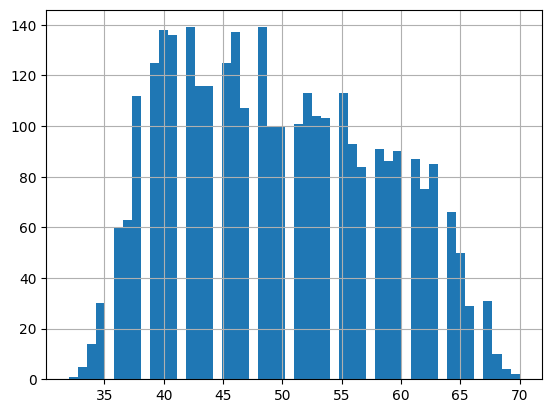

In [19]:
var = 'age'
print('Before coercion: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number
df[var].hist(bins=50) # Initial histogram; check out the x axis

count    3180.000000
mean       49.633962
std         8.557596
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64 

0 



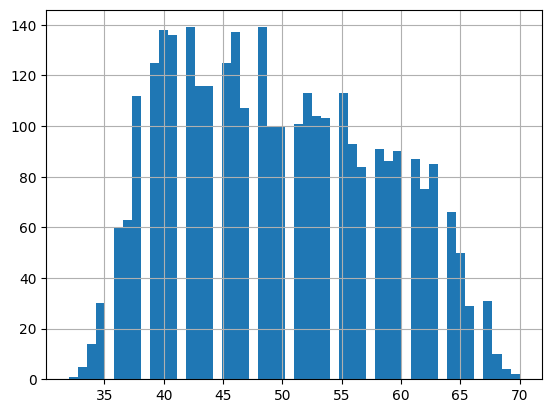

In [20]:
var = 'age'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['age_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['age_NA']),'\n') # How many missing values are there?

There are no missing age variables.

count    3095.000000
mean        1.957027
std         1.011135
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64 

85 



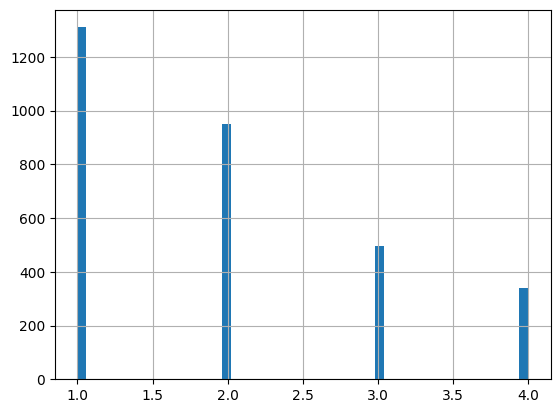

In [21]:
var = 'education'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['education_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['education_NA']),'\n') # How many missing values are there?

There are 85 missing education variables. 85/3180 is ~2.6% of our total data so it is still a relatively small number of missing values.The mean is 1.9. Since the integers represent categories of efucation that means that average amount of education someone has is some highschool (2). We will impute 2 for the missing values because there are few neough points to not skew the data, but enough that we do not want to drop all of those values.

In [22]:
var = 'education'
# Compute the value to impute:
impute_value = 2

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

count    3180.000000
mean        1.958176
std         0.997549
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64 

0 



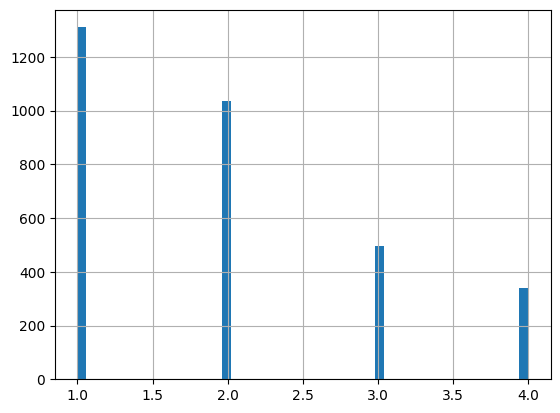

In [23]:
var = 'education'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['education_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['education_NA']),'\n') # How many missing values are there?

Now we have zero mising education values.

count    3180.000000
mean        0.490881
std         0.499995
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64 

0 



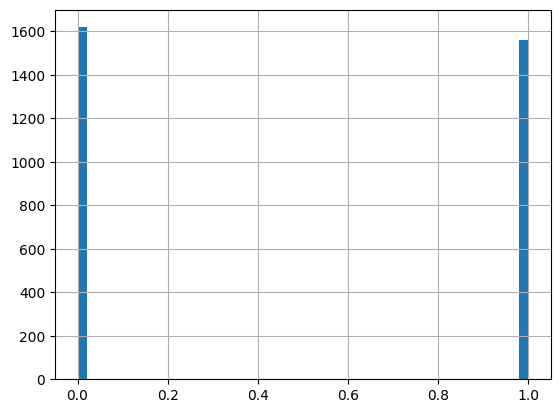

In [24]:
var = 'currentSmoker'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['currentSmoker_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['currentSmoker_NA']),'\n') # How many missing values are there?

No missing values in current smoker.

count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

24 



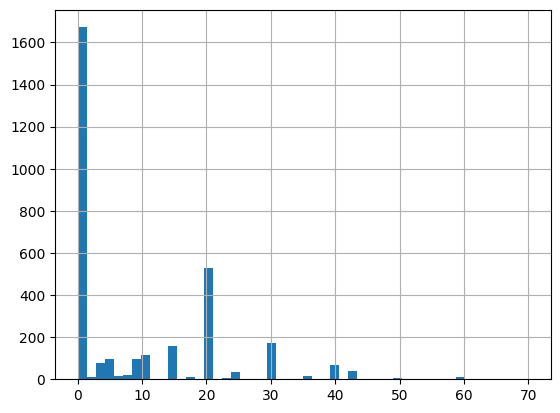

In [25]:
var = 'cigsPerDay'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['cigsPerDay_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['cigsPerDay_NA']),'\n') # How many missing values are there?

There are 24 missing values in the Cigarettes per day variables. This is a tough one because the mean is ~9 cigarettes per day but the 50th percentile of all values is 0 per day. So alot of people don't smoke at all, but if you do the average cigs per day increases quite a bit.
Because there are only 24 values missing which is 0.75% of the total responses we will drop these 24 points as imputing the data could lead to imputing values that are far from the truth.

In [26]:
df = df[df['cigsPerDay'].notna()]

count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

0 



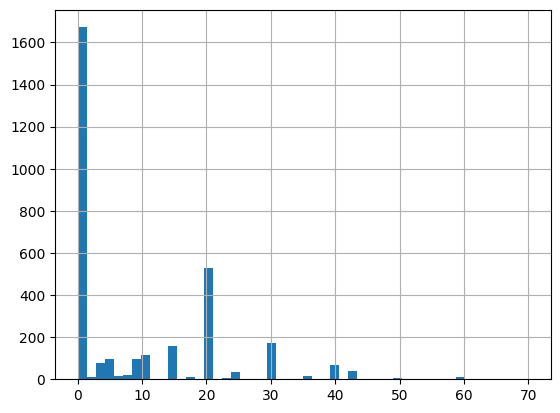

In [27]:
var = 'cigsPerDay'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['cigsPerDay_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['cigsPerDay_NA']),'\n') # How many missing values are there?

Now we have no NAs in cigsPerDay

count    3119.000000
mean        0.029817
std         0.170110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64 

37 



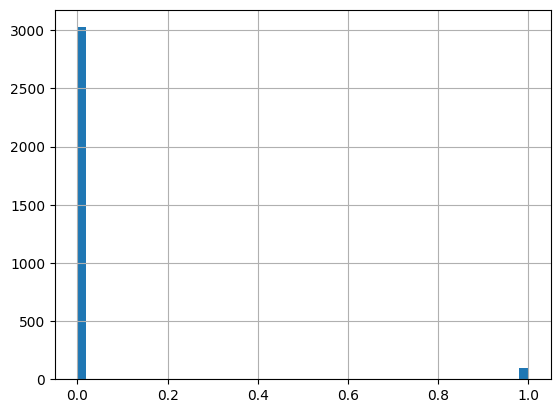

In [28]:
var = 'BPMeds'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BPMeds_NA']),'\n') # How many missing values are there?

For these 37 missing values we will impute 0 because a great majority of people fall into the zero category.

In [29]:
var = 'BPMeds'
# Compute the value to impute:
impute_value = 0

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

count    3156.000000
mean        0.029468
std         0.169140
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64 

0 



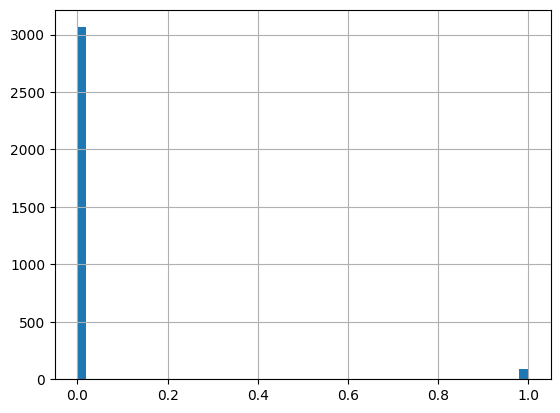

In [30]:
var = 'BPMeds'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BPMeds_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BPMeds_NA']),'\n') # How many missing values are there?

Now there are zero missing BPMeds values

count    3156.000000
mean        0.006654
std         0.081313
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64 

0 



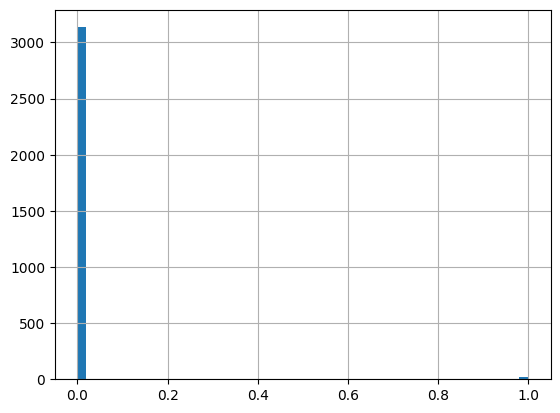

In [31]:
var = 'prevalentStroke'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['prevalentStroke_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['prevalentStroke_NA']),'\n') # How many missing values are there?

There are zero missing prevalent stroke values.

count    3156.000000
mean        0.321610
std         0.467168
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64 

0 



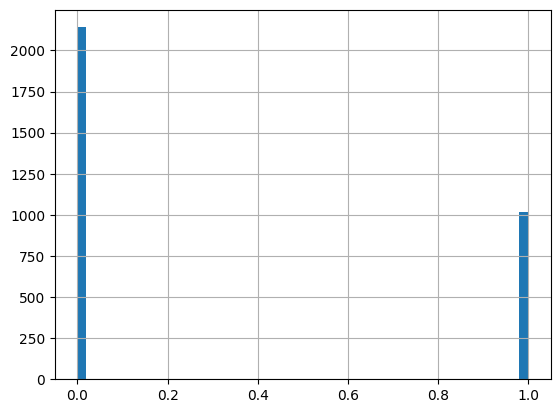

In [32]:
var = 'prevalentHyp'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['prevalentHyp_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['prevalentHyp_NA']),'\n') # How many missing values are there?

There are zero missing prevalent hyp values.

count    3156.000000
mean        0.026299
std         0.160049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64 

0 



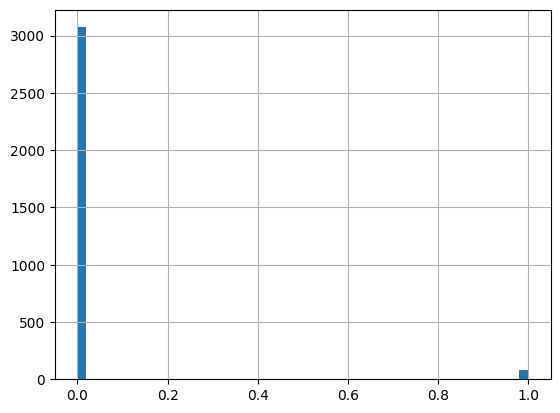

In [33]:
var = 'diabetes'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['diabetes_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['diabetes_NA']),'\n') # How many missing values are there?

There are zero missing diabetes values.

count    3117.000000
mean      236.538017
std        44.859046
min       107.000000
25%       205.000000
50%       233.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64 

39 



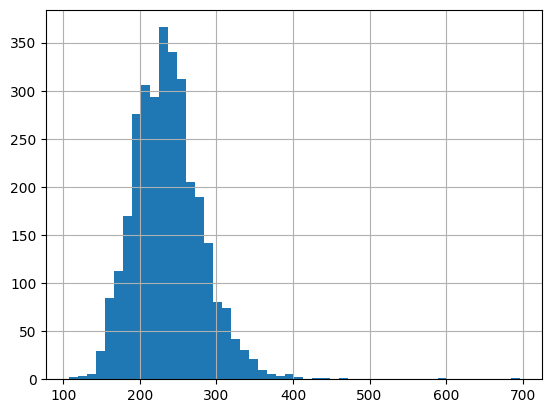

In [34]:
var = 'totChol'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['totChol_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['totChol_NA']),'\n') # How many missing values are there?

The data looks pretty normally distributed. We will impute the mean for the 39 missing values.

In [35]:
var = 'totChol'
# Compute the value to impute:
impute_value = 236.538017

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

count    3156.000000
mean      236.538017
std        44.580925
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64 

0 



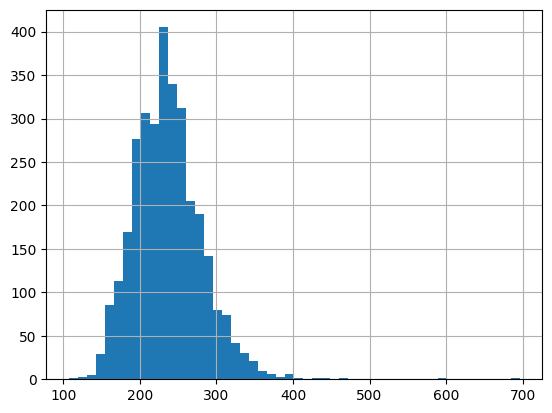

In [36]:
var = 'totChol'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['totChol_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['totChol_NA']),'\n') # How many missing values are there?

No missing values now.

count    3156.000000
mean      132.781527
std        22.432237
min        83.500000
25%       117.000000
50%       129.000000
75%       144.125000
max       295.000000
Name: sysBP, dtype: float64 

0 



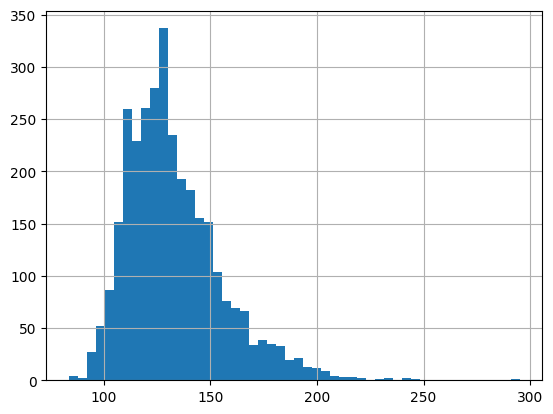

In [37]:
var = 'sysBP'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['sysBP_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['sysBP_NA']),'\n') # How many missing values are there?

There are no missing sysBP values.

count    3156.000000
mean       83.112801
std        11.991900
min        50.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64 

0 



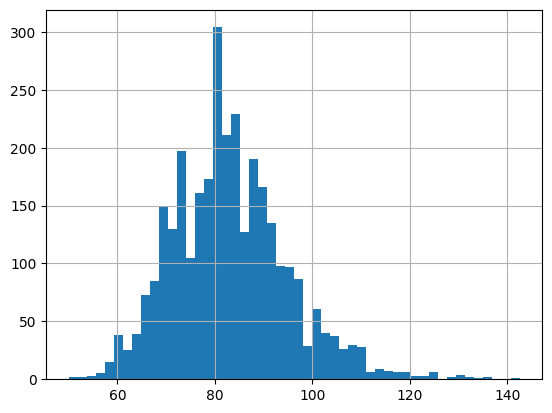

In [38]:
var = 'diaBP'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['diaBP_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['diaBP_NA']),'\n') # How many missing values are there?

There are no missing diaBP values.

count    3141.000000
mean       25.889061
std         4.131518
min        15.540000
25%        23.100000
50%        25.490000
75%        28.150000
max        56.800000
Name: BMI, dtype: float64 

15 



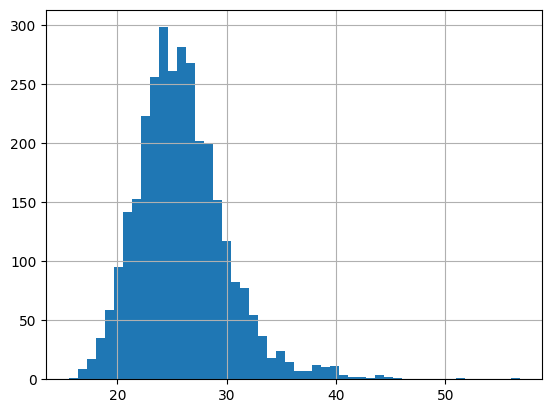

In [39]:
var = 'BMI'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BMI_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BMI_NA']),'\n') # How many missing values are there?

The data looks pretty normally distributed. We will impute the mean for the 15 missing values.

In [40]:
var = 'BMI'
# Compute the value to impute:
impute_value = 25.889061

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

count    3156.000000
mean       25.889061
std         4.121685
min        15.540000
25%        23.100000
50%        25.510000
75%        28.122500
max        56.800000
Name: BMI, dtype: float64 

0 



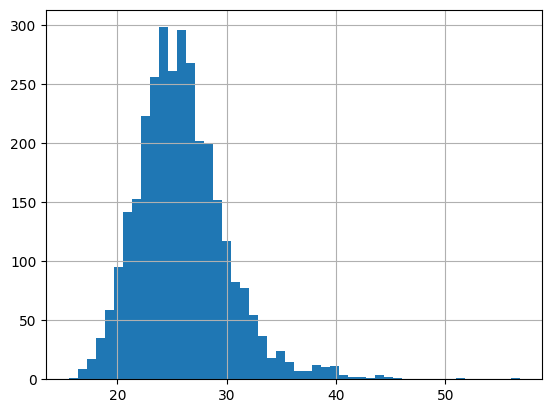

In [41]:
var = 'BMI'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['BMI_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['BMI_NA']),'\n') # How many missing values are there?

No missing BMI values now.

count    3156.000000
mean       75.923954
std        12.038393
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       140.000000
Name: heartRate, dtype: float64 

0 



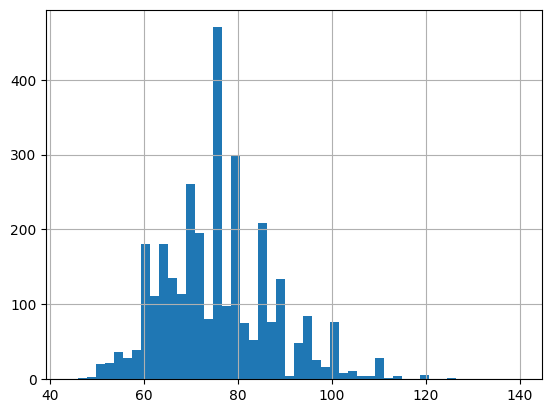

In [42]:
var = 'heartRate'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['heartRate_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['heartRate_NA']),'\n') # How many missing values are there?

No missing vals.

count    2875.000000
mean       81.818783
std        23.668175
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64 

281 



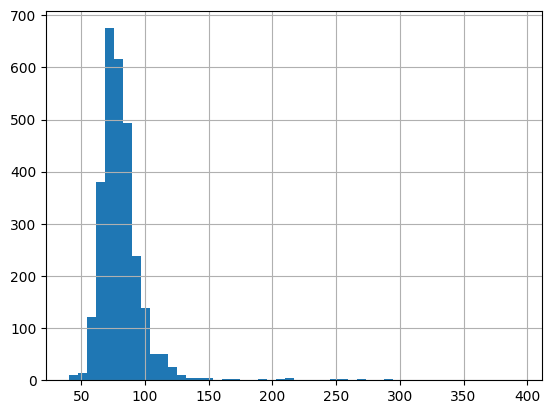

In [43]:
var = 'glucose'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['glucose_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['glucose_NA']),'\n') # How many missing values are there?

*281* misisng values here. We will impute the mean so that we don't lose 281 values.

In [44]:
var = 'glucose'
# Compute the value to impute:
impute_value = 81.818783

# Impute the median of the non-missing data:
df[var] = df[var].fillna(impute_value)

count    3156.000000
mean       81.818783
std        22.589597
min        40.000000
25%        72.000000
50%        79.000000
75%        85.000000
max       394.000000
Name: glucose, dtype: float64 

0 



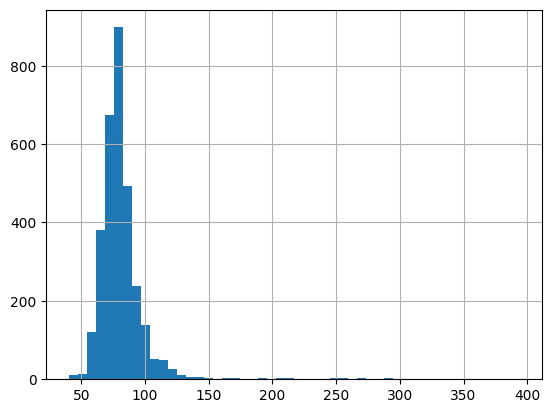

In [45]:
var = 'glucose'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['glucose_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['glucose_NA']),'\n') # How many missing values are there?

No missing values now.

count    3156.000000
mean        0.153676
std         0.360695
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64 

0 



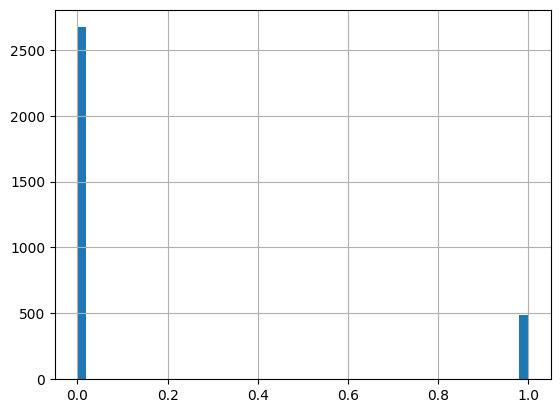

In [46]:
var = 'TenYearCHD'

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['TenYearCHD_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['TenYearCHD_NA']),'\n') # How many missing values are there?

No missing values.



---



# Results

Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.

## Visualizations and Statistics



---



# Conclusion

One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.



---



# Appendix

If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.



---

